In [1]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ML/updated/Titas_HistoricalPrices - Titas_HistoricalPrices.csv')

In [2]:
df

,Date,Open,High,Low,Close,Volume
0,2008-07-10,33.18,33.68,32.38,32.86,1.310925e+05
1,2008-07-14,32.16,32.16,30.74,31.13,8.604750e+04
2,2008-07-15,30.48,30.74,29.26,29.46,5.832750e+04
3,2008-07-16,28.23,28.33,27.27,27.32,1.911525e+05
4,2008-07-17,28.92,28.92,27.27,27.64,2.356200e+05
...,...,...,...,...,...,...
2669,2022-08-04,41.60,42.10,41.10,41.30,1.149216e+06
2670,2022-08-08,41.70,42.60,41.00,41.50,2.250486e+06
2671,2022-08-10,41.50,41.60,40.90,41.10,1.820146e+06
2672,2022-08-11,41.30,41.30,40.90,40.90,1.281802e+06


In [3]:
df = df[['Date', 'Close']]
df.head(10)

,Date,Close
0,2008-07-10,32.86
1,2008-07-14,31.13
2,2008-07-15,29.46
3,2008-07-16,27.32
4,2008-07-17,27.64
5,2008-07-21,27.53
6,2008-07-22,27.60
7,2008-07-23,27.29
8,2008-07-24,27.25
9,2008-07-28,27.25


In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2008-07-28')
datetime_object

datetime.datetime(2008, 7, 28, 0, 0)

In [5]:
df['Date'] = df['Date'].apply(str_to_datetime)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
df['Date']

0      2008-07-10
1      2008-07-14
2      2008-07-15
3      2008-07-16
4      2008-07-17
          ...    
2669   2022-08-04
2670   2022-08-08
2671   2022-08-10
2672   2022-08-11
2673   2022-08-16
Name: Date, Length: 2674, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')

In [8]:
df.index

DatetimeIndex(['2008-07-10', '2008-07-14', '2008-07-15', '2008-07-16',
               '2008-07-17', '2008-07-21', '2008-07-22', '2008-07-23',
               '2008-07-24', '2008-07-28',
               ...
               '2022-07-27', '2022-07-28', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04', '2022-08-08', '2022-08-10',
               '2022-08-11', '2022-08-16'],
              dtype='datetime64[ns]', name='Date', length=2674, freq=None)

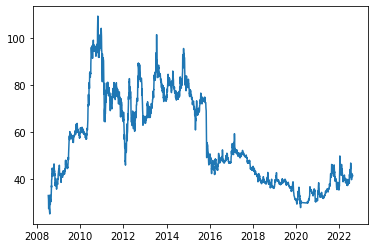

In [9]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [10]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  #print(target_date)
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+2)
    #print(df_subset)
    
    if len(df_subset) != n+2:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=100)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n+1):
    X[:, i]
    ret_df[f'Target-{n+1-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df



In [11]:
# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2008-07-28', 
                                '2022-08-11',                         
                                n=5)
windowed_df

,Target Date,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2008-07-28,27.32,27.64,27.53,27.60,27.29,27.25,27.25
1,2008-07-29,27.64,27.53,27.60,27.29,27.25,27.25,27.25
2,2008-07-30,27.53,27.60,27.29,27.25,27.25,27.25,26.67
3,2008-07-31,27.60,27.29,27.25,27.25,27.25,26.67,26.13
4,2008-08-04,27.29,27.25,27.25,27.25,26.67,26.13,25.02
...,...,...,...,...,...,...,...,...
2659,2022-08-03,41.90,41.20,40.40,39.60,41.20,42.20,41.80
2660,2022-08-04,41.20,40.40,39.60,41.20,42.20,41.80,41.30
2661,2022-08-08,40.40,39.60,41.20,42.20,41.80,41.30,41.50
2662,2022-08-10,39.60,41.20,42.20,41.80,41.30,41.50,41.10


In [12]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2664,), (2664, 6, 1), (2664,))

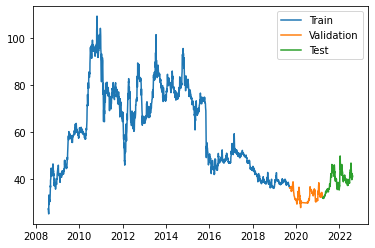

In [13]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90,]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((6, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['mean_absolute_error'])

# model.compile(
#     optimizer=Adam(learning_rate=0.001),
#     loss='mse',
#     metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [16]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
67/67 [==============================] - 1s 11ms/step - loss: 2.5926 - mean_absolute_error: 1.1092 - val_loss: 0.5120 - val_mean_absolute_error: 0.4576
Epoch 2/100
67/67 [==============================] - 1s 11ms/step - loss: 2.9027 - mean_absolute_error: 1.2029 - val_loss: 0.5236 - val_mean_absolute_error: 0.4577
Epoch 3/100
67/67 [==============================] - 1s 17ms/step - loss: 2.6725 - mean_absolute_error: 1.1218 - val_loss: 0.7739 - val_mean_absolute_error: 0.7152
Epoch 4/100
67/67 [==============================] - 1s 11ms/step - loss: 2.6623 - mean_absolute_error: 1.1083 - val_loss: 0.5849 - val_mean_absolute_error: 0.5616
Epoch 5/100
67/67 [==============================] - 1s 10ms/step - loss: 2.7334 - mean_absolute_error: 1.1512 - val_loss: 0.6939 - val_mean_absolute_error: 0.6507
Epoch 6/100
67/67 [==============================] - 1s 10ms/step - loss: 2.5921 - mean_absolute_error: 1.0992 - val_loss: 0.5438 - val_mean_absolute_error: 0.5166
Epoch 7/100
67/6

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 6

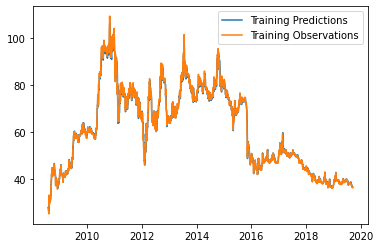

In [18]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

In [19]:
results = model.evaluate(X_train, y_train)

67/67 [==============================] - 0s 4ms/step - loss: 2.2069 - mean_absolute_error: 0.9473


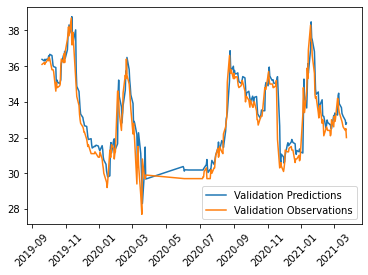

In [20]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.xticks(rotation = 45)
plt.legend(['Validation Predictions', 'Validation Observations'])

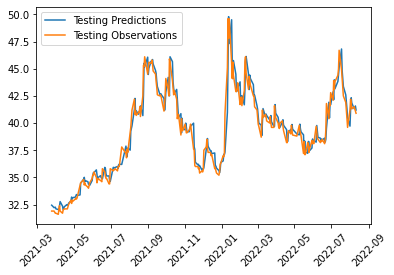

In [21]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.xticks(rotation = 45)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [22]:
results = model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 0.9620 - mean_absolute_error: 0.6960


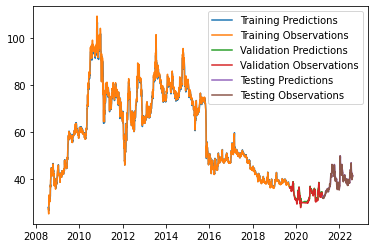

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])